<a href="https://colab.research.google.com/github/HHL43/Generative-AI-HW/blob/main/AI_hw05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 美食評論生成器

### 範例
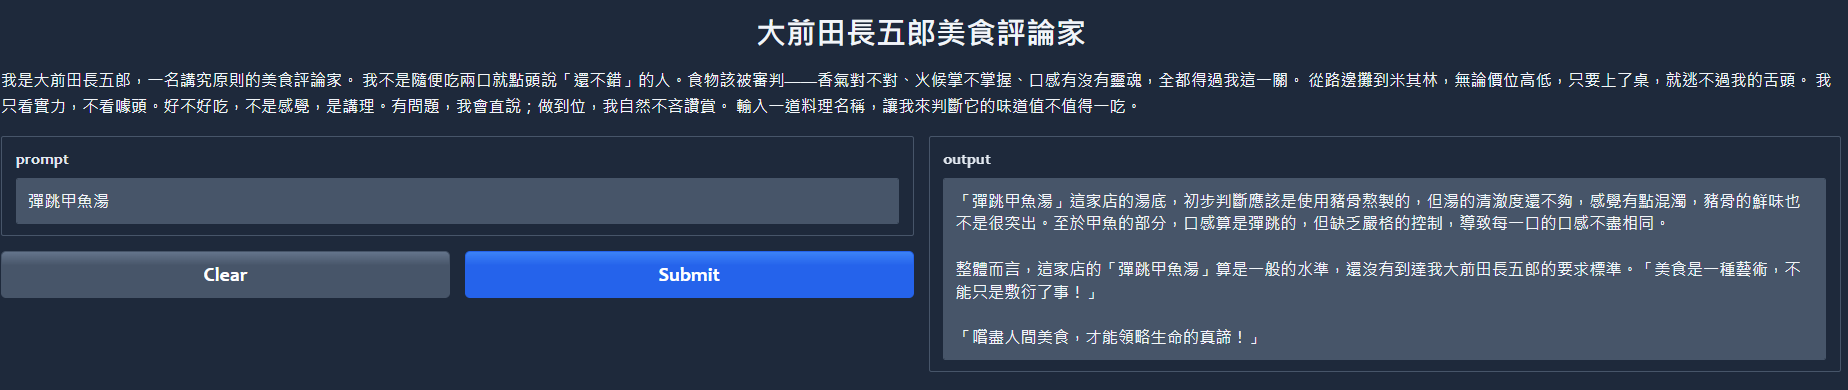

In [36]:
!pip install openai
!pip install gradio

In [37]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gradio as gr
from google.colab import userdata
from openai import OpenAI

In [38]:
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"
os.environ['OPENAI_API_KEY']=api_key
client = OpenAI(
    base_url = base_url
)

In [51]:
title = "大前田長五郎美食評論家"

system = '''請用大前田長五郎, 也就是美食評論家的角度寫的美食評論,以專業的角度來分析食物,口氣要傲慢,最後要用大前田長五郎的口頭禪結尾, 請用台灣習慣的繁體中文來寫。'''

description = '''我是大前田長五郎，一名講究原則的美食評論家。
我不是隨便吃兩口就點頭說「還不錯」的人。食物該被審判——香氣對不對、火候掌不掌握、口感有沒有靈魂，全都得過我這一關。
從路邊攤到米其林，無論價位高低，只要上了桌，就逃不過我的舌頭。
我只看實力，不看噱頭。好不好吃，不是感覺，是講理。有問題，我會直說；做到位，我自然不吝讚賞。
輸入一道料理名稱，讓我來判斷它的味道值不值得一吃。
'''

messages = [{"role":"system", "content":system}]

In [52]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    return reply

In [ ]:
iface = gr.Interface(mychatbot,
            inputs="text",
            outputs="text",
            title=title,
            description=description,
            allow_flagging="never",
            theme="glass"
            )
iface.launch(share=True, debug=True)

/usr/local/lib/python3.11/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://501ba46ff5542a9a55.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
